Imports

In [1]:
import altair as alt
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

## Load Parquet file for April 2019

In [2]:
parquet_file = pq.ParquetFile('../data/raw/parquet/2019-04/sds011/part-00000-18b6bc00-8426-4900-851e-b650c25b6cee-c000.snappy.parquet')

In [3]:
chunks = []
for i in range(parquet_file.num_row_groups):
    current_data = parquet_file.read_row_group(i).to_pandas()
    chunks.append(current_data[current_data.sensor_id == 2129])
df = pd.concat(chunks)
df.count()

sensor_id      16151
sensor_type    16151
location       16151
lat            16151
lon            16151
timestamp      16151
P1             16151
durP1              0
ratioP1            0
P2             16151
durP2              0
ratioP2            0
dtype: int64

In [5]:
df.head()

sensor_id sensor_type  location     lat     lon           timestamp  \
4761868     2129.0      SDS011    1071.0  52.544  13.375 2019-04-10 00:01:58   
4761869     2129.0      SDS011    1071.0  52.544  13.375 2019-04-10 00:04:25   
4761870     2129.0      SDS011    1071.0  52.544  13.375 2019-04-10 00:06:53   
4761871     2129.0      SDS011    1071.0  52.544  13.375 2019-04-10 00:09:21   
4761872     2129.0      SDS011    1071.0  52.544  13.375 2019-04-10 00:11:49   

            P1  durP1  ratioP1     P2  durP2  ratioP2  
4761868  18.90    NaN      NaN  14.60    NaN      NaN  
4761869  11.18    NaN      NaN   9.13    NaN      NaN  
4761870  16.37    NaN      NaN  13.10    NaN      NaN  
4761871  11.53    NaN      NaN  10.20    NaN      NaN  
4761872  10.20    NaN      NaN   8.77    NaN      NaN

## Plot P10 pollution values as interactive time series 

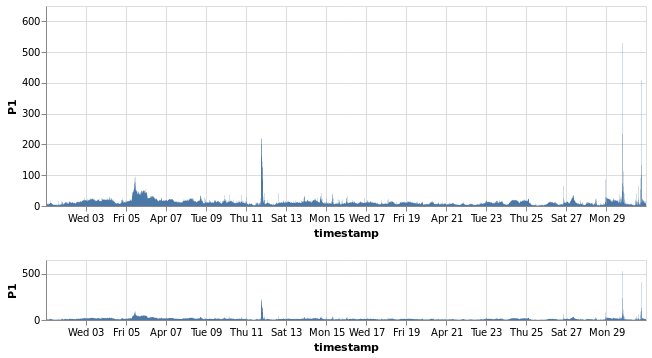

In [10]:
brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart(df).mark_area().encode(
    alt.X('timestamp:T', scale=alt.Scale(domain=brush)),
    y='P1:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(brush)

upper & lower

We can see several peaks ofr the sensor including one on April 11 in the evening, where a garage burned down in close proximity to the sensor. We can also see that the data is highly varying.